In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('Loan_data.csv', low_memory=False,index_col=0)
df = dataset[['loan_amnt', 'int_rate', 'annual_inc', 'avg_cur_bal', 'emp_length', 'fico_range_high', 'delinq_amnt', 'revol_util']]
X = dataset[['loan_amnt', 'int_rate', 'annual_inc', 'avg_cur_bal', 'emp_length', 'fico_range_high', 'delinq_amnt', 'revol_util']].values
y = dataset[['loan_status']].values

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
# Feature Scaling
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

## Question 1
#### Compute the first 2 principal components. Make a biplot and interpret the main sources of variation in the data.

In [4]:
# Applying PCA
pca_1 = PCA(n_components = 2)
X_1 = pca_1.fit_transform(X)

In [5]:
# get loadings on 5 most common terms
loadings = pd.DataFrame(pca_1.components_[0:2],index=['PC1','PC2'],columns = df.columns)
terms = list(df.sum(axis=0).sort_values(ascending=False)[0:10].index)
loadings = loadings[terms] 
loadings

,annual_inc,loan_amnt,avg_cur_bal,fico_range_high,revol_util,int_rate,delinq_amnt,emp_length
PC1,-0.020274,0.014471,-0.001298,-0.615533,0.569038,0.544340,0.016714,0.010382
PC2,0.569242,0.528036,0.561783,0.098662,0.166983,-0.058848,0.017470,0.200389


Text(0, 0.5, 'Second principal component')

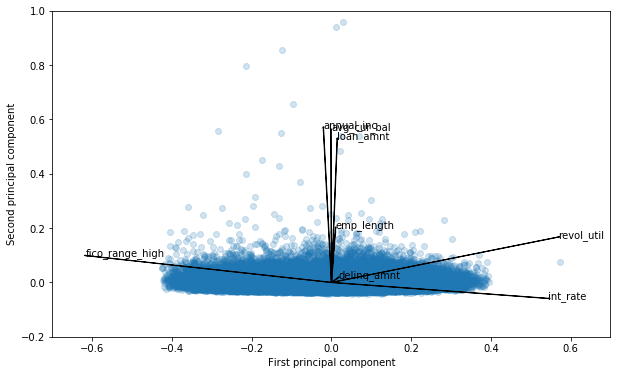

In [6]:
# Visualizing the results using a biplot
plt.figure(figsize=(10,6))
plt.scatter(X_1[:,0]/(X_1[:,0].max() - X_1[:,0].min()) ,X_1[:,1]/(X_1[:,1].max() - X_1[:,1].min()),alpha = 0.2)
for term in terms:
    plt.arrow(0,0,1*loadings.loc['PC1',term],1*loadings.loc['PC2',term])
    plt.text(1*loadings.loc['PC1',term],1*loadings.loc['PC2',term],term)
plt.xlim(-0.7,0.7)
plt.ylim(-0.2,1)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

## Question 2
#### Make a table with the percentage of variance explained by principal components. How many principal components would you expect to yield good results if used in classification?

In [7]:
pca_2 = PCA(n_components = None)
X_2 = pca_2.fit_transform(X)
explained_variance = pca_2.explained_variance_ratio_
explained_variance

array([0.23221313, 0.19515469, 0.1250745 , 0.12310819, 0.10497244,
       0.09258177, 0.07456788, 0.05232739])

## Question 3
#### Randomly allocate the data into an 80% training set, a 10% validation set and a 10% test set. Create a new, synthetic training dataset obtained by taking the training set and randomly undersampling non-defaulters. Non-defaulters should make up no more than 70% of the synthetic training data. 
####  Run eight logistic classifiers that predict default as a function of the first principal components, where q = 1, 2,...,8 on the training set.

In [10]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [11]:
# Importing the dataset
dataset = pd.read_csv('Loan_data.csv')
X = dataset[['loan_amnt', 'int_rate', 'annual_inc', 'avg_cur_bal', 'emp_length', 'fico_range_high', 'delinq_amnt', 'revol_util']].values
y = dataset[['loan_status']].values

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1111, random_state = 0)

In [13]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [14]:
# Applying Random Undersampling with replacement
rus = RandomUnderSampler(random_state = 69, replacement = True)
X_train_resampled, y_train_resampled = rus.fit_sample(X_train, y_train)

In [15]:
# Applying PCA for all 8 principle components
pca_1 = PCA(n_components = 1)
X_train_resampled_1 = pca_1.fit_transform(X_train_resampled)

pca_2 = PCA(n_components = 2)
X_train_resampled_2 = pca_2.fit_transform(X_train_resampled)

pca_3 = PCA(n_components = 3)
X_train_resampled_3 = pca_3.fit_transform(X_train_resampled)

pca_4 = PCA(n_components = 4)
X_train_resampled_4 = pca_4.fit_transform(X_train_resampled)

pca_5 = PCA(n_components = 5)
X_train_resampled_5 = pca_5.fit_transform(X_train_resampled)

pca_6 = PCA(n_components = 6)
X_train_resampled_6 = pca_6.fit_transform(X_train_resampled)

pca_7 = PCA(n_components = 7)
X_train_resampled_7 = pca_7.fit_transform(X_train_resampled)

pca_8 = PCA(n_components = 8)
X_train_resampled_8 = pca_8.fit_transform(X_train_resampled)

In [16]:
# Fitting Logistic Regression to the Training set
classifier_1 = LogisticRegression(random_state = 0)
classifier_1.fit(X_train_resampled_1, y_train_resampled)

classifier_2 = LogisticRegression(random_state = 0)
classifier_2.fit(X_train_resampled_2, y_train_resampled)

classifier_3 = LogisticRegression(random_state = 0)
classifier_3.fit(X_train_resampled_3, y_train_resampled)

classifier_4 = LogisticRegression(random_state = 0)
classifier_4.fit(X_train_resampled_4, y_train_resampled)

classifier_5 = LogisticRegression(random_state = 0)
classifier_5.fit(X_train_resampled_5, y_train_resampled)

classifier_6 = LogisticRegression(random_state = 0)
classifier_6.fit(X_train_resampled_6, y_train_resampled)

classifier_7 = LogisticRegression(random_state = 0)
classifier_7.fit(X_train_resampled_7, y_train_resampled)

classifier_8 = LogisticRegression(random_state = 0)
classifier_8.fit(X_train_resampled_8, y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 4
#### For each model, get the implied probabilities of default of all borrowers in the validation set. Use these predictions and actual default outcomes on the validation set to calculate the cross-entropy loss for each q.
#### Which q has the lowest loss on the validation set? What is the performance of this model in terms of cross-entropy loss on the test set?

In [18]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [19]:
# Importing the dataset
dataset = pd.read_csv('Loan_data.csv')
X = dataset[['loan_amnt', 'int_rate', 'annual_inc', 'avg_cur_bal', 'emp_length', 'fico_range_high', 'delinq_amnt', 'revol_util']].values
y = dataset[['loan_status']].values

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1111, random_state = 0)

In [21]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [22]:
# Applying Random Undersampling with replacement
rus = RandomUnderSampler(random_state = 69, replacement = True)
X_train_resampled, y_train_resampled = rus.fit_sample(X_train, y_train)

In [23]:
def Logistic_Pca(n_comp):
    pca = PCA(n_components = n_comp)
    X_val_1 = pca.fit_transform(X_val)
    X_train_resampled_1 = pca.fit_transform(X_train_resampled)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train_resampled_1, y_train_resampled)
    
    proba = classifier.predict_proba(X_val_1)
    y_pred = classifier.predict(X_val_1)
    
    return proba[:, 1]

In [24]:
# cross entropy loss for the firt q principle components
def cross_entropy(y_pred,y):
    L = - y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
    loss = np.sum(L) / y_pred.shape[0]
    return loss
for i in range(1, 9):
    print("q" + str(i) + " = " + str(cross_entropy(Logistic_Pca(i), y_val)))

q1 = 0.7364141325630953
q2 = 0.7358643559400326
q3 = 0.76671581517587
q4 = 0.7891316909737617
q5 = 0.8042995704894306
q6 = 0.8022800074529541
q7 = 0.8018933278253045
q8 = 0.8088971872017758


In [25]:
# Cross entropy loss of model with 1 pca tested on the test set
pca_2 = PCA(n_components = 2)
X_test_2 = pca_2.fit_transform(X_test)
X_train_resampled_2 = pca_2.fit_transform(X_train_resampled)

classifier_2 = LogisticRegression(random_state = 0)
classifier_2.fit(X_train_resampled_2, y_train_resampled)

proba_test_2 = classifier_2.predict_proba(X_test_2)
cross_entropy(proba_test_2[:, 1], y_test)

0.7136296567352531

## Question 5
#### Using the same data as before, cluster borrowers into K groups using the K-means algorithm, where K ranges from 1 to 10. Design a graphical tool that helps you pick a good number of clusters (there is some subjectivity involved in picking this number). Examine the characteristics of borrowers in each of the clusters in terms of the first 2 principal components.

In [26]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [27]:
# Importing the dataset
dataset = pd.read_csv('Loan_data.csv')
X = dataset[['loan_amnt', 'int_rate', 'annual_inc', 'avg_cur_bal', 'emp_length', 'fico_range_high', 'delinq_amnt', 'revol_util']].values
y = dataset[['loan_status']].values

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1111, random_state = 0)

In [29]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [30]:
# Applying Random Undersampling with replacement
rus = RandomUnderSampler(random_state = 69, replacement = True)
X_train_resampled, y_train_resampled = rus.fit_sample(X_train, y_train)

In [31]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init =10, random_state = 0)
    kmeans.fit(X_train_resampled)
    wcss.append(kmeans.inertia_)

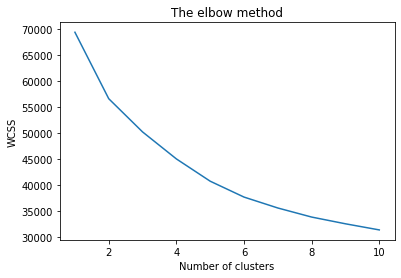

In [32]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init =10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)